## Graficación Viento

## 0. Preparacion

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df_2020_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/TODO/BASES_2020_2024_SP.csv')
df_UBI = pd.read_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/UBICACIONES/UBI.csv')

<ipython-input-4-af5992e516e5>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/TODO/BASES_2020_2024_SP.csv')


In [ ]:
df_2020_2024

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,zona
0,1/1/20 0:00,NaN,NaN,NaN,NaN,NaN,86.34,60.91,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CENTRO
1,1/1/20 1:00,NaN,NaN,6.5,9.8,19.0,112.01,85.64,713.6,0.0,91.0,NaN,0.158,10.49,3.7,2.0,CENTRO
2,1/1/20 2:00,NaN,NaN,5.6,8.8,18.0,100.01,72.39,712.8,0.0,91.0,NaN,0.156,10.51,1.9,144.0,CENTRO
3,1/1/20 3:00,3.22,3.2,7.2,10.4,14.0,106.2,70.25,712.4,0.0,92.0,2.9,0.158,10.64,2.7,28.0,CENTRO
4,1/1/20 4:00,3.26,4.7,10.6,15.3,5.0,141.86,93.72,712.0,0.0,92.0,3.3,0.163,10.73,2.0,31.0,CENTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659356,7/31/24 19:00,"1,18","4,2","11,1","15,2",16.0,117.0,"13,73","707,5",0.0,46.0,"2,8","0,003","29,87","13,1",63.0,NOROESTE3
659357,7/31/24 20:00,"1,33","4,4","12,5","16,8",13.0,90.0,"13,05","707,9",0.0,48.0,"2,7",0,"28,93","11,8",41.0,NOROESTE3
659358,7/31/24 21:00,"1,47","4,6","12,1","16,6",12.0,90.0,"12,72","708,4",0.0,50.0,3,0,"28,31","11,6",41.0,NOROESTE3
659359,7/31/24 22:00,"1,26","4,8","11,3",16,12.0,104.0,"13,63","709,1",0.0,58.0,3,0,"27,25","15,3",35.0,NOROESTE3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Función para codificar la columna 'Zona' y generar el diccionario de encoding
def encode_zona(df):
    # Crear el codificador
    le = LabelEncoder()

    # Ajustar el codificador a la columna 'Zona' y transformar los valores
    df['zona_encoded'] = le.fit_transform(df['zona'])

    # Crear el diccionario de encoding
    zona_dict = dict(zip(le.classes_, le.transform(le.classes_)))

    # Eliminar la columna 'Zona' original
    df = df.drop(columns=['zona'])

    return df, zona_dict

# Aplicar la codificación a cada DataFrame
df_2020_2024, zona_dict_2020_2024 = encode_zona(df_2020_2024)

# Mostrar los diccionarios de encoding para cada DataFrame
print("Diccionario de encoding para 2020-2024:", zona_dict_2020_2024)

# Guardar los DataFrames con la columna 'Zona' eliminada y la columna 'Zona_encoded'
#df_2020_2024.to_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/TODO/BASES_2020_2024_SP_encoded.csv', index=False)

print("Los archivos con la columna 'Zona' eliminada han sido guardados.")

Diccionario de encoding para 2020-2024: {'CENTRO': 0, 'NORESTE': 1, 'NORESTE2': 2, 'NORESTE3': 3, 'NOROESTE': 4, 'NOROESTE2': 5, 'NOROESTE3': 6, 'NORTE': 7, 'NORTE2': 8, 'SUR': 9, 'SURESTE': 10, 'SURESTE2': 11, 'SURESTE3': 12, 'SUROESTE': 13, 'SUROESTE2': 14}
Los archivos con la columna 'Zona' eliminada han sido guardados.


In [ ]:
import pandas as pd

# Definir columnas relevantes para la imputación
columnas_relevantes = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']

# Convertir solo las columnas relevantes a formato numérico
df_2020_2024[columnas_relevantes] = df_2020_2024[columnas_relevantes].apply(pd.to_numeric, errors='coerce')

# Función para eliminar los outliers usando el rango intercuartílico (IQR)
def eliminar_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    outliers_count = ((col < lower_bound) | (col > upper_bound)).sum()

    # Reemplazar outliers por NaN
    col_cleaned = col.where((col >= lower_bound) & (col <= upper_bound))

    return col_cleaned, outliers_count

# Inicializar un DataFrame para almacenar la cantidad de outliers
outliers_info = {}

# Aplicar la función para eliminar outliers en las columnas relevantes
for col in columnas_relevantes:
    df_2020_2024[col], count = eliminar_outliers(df_2020_2024[col])
    outliers_info[col] = count

# Mostrar resultados, asegurando que se mantengan las columnas 'date', 'time', y 'Zona_encoded'
print("Dataframe con outliers reemplazados por NaN:")
print(df_2020_2024)

# Mostrar la cantidad de outliers por columna
print("\nCantidad de outliers reemplazados por columna:")
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers")


Dataframe con outliers reemplazados por NaN:
                 date    CO   NO   NO2   NOX    O3    PM10  PM2.5    PRS  \
0         1/1/20 0:00   NaN  NaN   NaN   NaN   NaN   86.34    NaN    NaN   
1         1/1/20 1:00   NaN  NaN   6.5   9.8  19.0  112.01    NaN  713.6   
2         1/1/20 2:00   NaN  NaN   5.6   8.8  18.0  100.01    NaN  712.8   
3         1/1/20 3:00  3.22  3.2   7.2  10.4  14.0  106.20    NaN  712.4   
4         1/1/20 4:00  3.26  4.7  10.6  15.3   5.0     NaN    NaN  712.0   
...               ...   ...  ...   ...   ...   ...     ...    ...    ...   
659356  7/31/24 19:00   NaN  NaN   NaN   NaN  16.0  117.00    NaN    NaN   
659357  7/31/24 20:00   NaN  NaN   NaN   NaN  13.0   90.00    NaN    NaN   
659358  7/31/24 21:00   NaN  NaN   NaN   NaN  12.0   90.00    NaN    NaN   
659359  7/31/24 22:00   NaN  NaN   NaN  16.0  12.0  104.00    NaN    NaN   
659360  7/31/24 23:00   NaN  NaN   NaN   NaN   NaN     NaN    NaN    NaN   

        RAINF    RH  SO2   SR   TOUT  WSR 

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=f16dd6624ade37cd7b987b95b10b9d71c132a35f038bc70c1c91e09d54435601
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=8409701aff294c7f6df5f6c9f6a0a92fbc65b615227b674b19672ddb0104cfd2
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer  # MICE implementation in fancyimpute

# Preprocesamiento de los datos
df_2020_2024['date'] = pd.to_datetime(df_2020_2024['date'])
df_2020_2024.set_index('date', inplace=True)
df_2020_2024.sort_index(inplace=True)

# Convertir a formato numérico las columnas relevantes (importante para imputar correctamente)
df_2020_2024_numeric = df_2020_2024.apply(pd.to_numeric, errors='coerce')

# Mantener la columna "Zona" separada
df_zona = df_2020_2024[['zona_encoded']]  # Guarda la columna 'Zona'

# Seleccionar las columnas relevantes para la imputación (las numéricas)
variables_para_imputar = df_2020_2024_numeric[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2', 'WSR' ,	'WDR']]  # Añade más columnas si es necesario

# Aplicar el algoritmo MICE para imputación
mice_imputer = IterativeImputer()  # Por defecto usa regresión bayesiana iterativa (JUSTIFICAR)
df_imputed_mice = mice_imputer.fit_transform(variables_para_imputar)

# Convertir de nuevo a dataframe para mantener el formato original
df_imputed_mice = pd.DataFrame(df_imputed_mice, columns=variables_para_imputar.columns, index=variables_para_imputar.index)

# Reintegrar la columna "Zona" al DataFrame imputado
df_final = pd.concat([df_imputed_mice, df_zona], axis=1)

# Mostrar el DataFrame final
print(df_final)


<ipython-input-9-5fa946404318>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2020_2024['date'] = pd.to_datetime(df_2020_2024['date'])


                           CO        NO        NO2        NOX         O3  \
date                                                                       
2020-01-01 00:00:00  1.590513  7.429848  14.237414  21.449283  26.809009   
2020-01-01 00:00:00  1.381808  7.176633  10.646510  17.772000  23.948641   
2020-01-01 00:00:00  1.476593  7.306120  12.767709  19.890098  25.725538   
2020-01-01 00:00:00  1.459790  7.287871  12.550938  19.660130  25.565734   
2020-01-01 00:00:00  1.412255  7.235056  11.923070  18.993616  25.130810   
...                       ...       ...        ...        ...        ...   
2024-07-31 23:00:00  1.412255  7.235056  11.923070  18.993616  25.130810   
2024-07-31 23:00:00  1.559661  0.331810  10.146920  10.000000  20.000000   
2024-07-31 23:00:00  1.567964  7.000000   9.000000  15.642175  22.000000   
2024-07-31 23:00:00  1.412255  7.235056  11.923070  18.993616  25.130810   
2024-07-31 23:00:00  1.412255  7.235056  11.923070  18.993616  25.130810   

           

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df_final.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WSR,WDR,zona_encoded
date,,,,,,,,,,,
2020-01-01,1.590513,7.429848,14.237414,21.449283,26.809009,86.340000,26.833002,5.259488,7.650536,130.672489,0
2020-01-01,1.381808,7.176633,10.646510,17.772000,23.948641,37.000000,18.000000,4.565240,7.060968,122.526566,12
2020-01-01,1.476593,7.306120,12.767709,19.890098,25.725538,66.000000,21.508055,4.889302,7.615128,127.187992,10
2020-01-01,1.459790,7.287871,12.550938,19.660130,25.565734,63.000000,20.722665,4.834703,7.609906,126.674054,13
2020-01-01,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,9


In [ ]:
df_UBI = pd.read_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/UBICACIONES/UBI.csv')

In [ ]:
import pandas as pd

# Ejemplo de tu DataFrame, df_UBI

# Diccionario de encoding de las zonas
zona_dict = {
    'CENTRO': 0,
    'NORESTE': 1,
    'NORESTE2': 2,
    'NORESTE3': 3,
    'NOROESTE': 4,
    'NOROESTE2': 5,
    'NOROESTE3': 6,
    'NORTE': 7,
    'NORTE2': 8,
    'SUR': 9,
    'SURESTE': 10,
    'SURESTE2': 11,
    'SURESTE3': 12,
    'SUROESTE': 13,
    'SUROESTE2': 14,
}



# 1. Reemplazar la columna 'Zona' con los valores del diccionario
df_UBI['Zona'] = df_UBI['Zona'].map(zona_dict)

# 2. Separar la columna 'location' en 'latitud' y 'longitud'
df_UBI[['latitud', 'longitud']] = df_UBI['location'].str.split(',', expand=True)

# 3. Convertir 'latitud' y 'longitud' en formato numérico
df_UBI['latitud'] = pd.to_numeric(df_UBI['latitud'])
df_UBI['longitud'] = pd.to_numeric(df_UBI['longitud'])

# 4. Eliminar la columna original 'location' si ya no es necesaria
df_UBI = df_UBI.drop(columns=['location'])

# Mostrar el DataFrame actualizado
#print(df_UBI)

import pandas as pd

# Asegúrate de que la columna 'date' ya no sea un índice
df_final = df_final.reset_index()  # 'date' vuelve a ser una columna

# Separar la columna 'date' en 'date' y 'time'
df_final['date'] = pd.to_datetime(df_final['date'])  # Convertir a formato datetime si no lo está
df_final['time'] = df_final['date'].dt.time  # Extraer la hora
df_final['date'] = df_final['date'].dt.date  # Extraer solo la fecha

# Unir los dataframes usando la columna 'zona_encoded' como clave
df_completo = df_final.merge(df_UBI, left_on='zona_encoded', right_on='Zona')

# Opcional: Si quieres que 'date' vuelva a ser el índice después del merge
# df_completo = df_completo.set_index('date')

# Mostrar el DataFrame actualizado
print(df_completo)



              date        CO        NO        NO2        NOX         O3  \
0       2020-01-01  1.590513  7.429848  14.237414  21.449283  26.809009   
1       2020-01-01  1.381808  7.176633  10.646510  17.772000  23.948641   
2       2020-01-01  1.476593  7.306120  12.767709  19.890098  25.725538   
3       2020-01-01  1.459790  7.287871  12.550938  19.660130  25.565734   
4       2020-01-01  1.412255  7.235056  11.923070  18.993616  25.130810   
...            ...       ...       ...        ...        ...        ...   
659355  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   
659356  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   
659357  2024-07-31  1.559661  0.331810  10.146920  10.000000  20.000000   
659358  2024-07-31  1.567964  7.000000   9.000000  15.642175  22.000000   
659359  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   

             PM10      PM2.5       SO2       WSR         WDR  zona_encoded  \
0       86.340000  26

In [ ]:
df_final

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WSR,WDR,zona_encoded,time
0,2020-01-01,1.590513,7.429848,14.237414,21.449283,26.809009,86.340000,26.833002,5.259488,7.650536,130.672489,0,00:00:00
1,2020-01-01,1.381808,7.176633,10.646510,17.772000,23.948641,37.000000,18.000000,4.565240,7.060968,122.526566,12,00:00:00
2,2020-01-01,1.476593,7.306120,12.767709,19.890098,25.725538,66.000000,21.508055,4.889302,7.615128,127.187992,10,00:00:00
3,2020-01-01,1.459790,7.287871,12.550938,19.660130,25.565734,63.000000,20.722665,4.834703,7.609906,126.674054,13,00:00:00
4,2020-01-01,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,9,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659356,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,3,23:00:00
659357,2024-07-31,1.559661,0.331810,10.146920,10.000000,20.000000,79.000000,24.270156,4.043973,7.497009,102.000000,13,23:00:00
659358,2024-07-31,1.567964,7.000000,9.000000,15.642175,22.000000,93.000000,28.799963,5.417768,7.406626,135.000000,1,23:00:00
659359,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,7,23:00:00


In [ ]:
df_completo

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WSR,WDR,zona_encoded,time,Zona,Nombre_Estacion,Clave_Estacion,latitud,longitud
0,2020-01-01,1.590513,7.429848,14.237414,21.449283,26.809009,86.340000,26.833002,5.259488,7.650536,130.672489,0,00:00:00,0,Centro Obispado,Obispado,25.676020,-100.335847
1,2020-01-01,1.381808,7.176633,10.646510,17.772000,23.948641,37.000000,18.000000,4.565240,7.060968,122.526566,12,00:00:00,12,Sureste3 Cadereyta,Cadereyta,25.600870,-99.995334
2,2020-01-01,1.476593,7.306120,12.767709,19.890098,25.725538,66.000000,21.508055,4.889302,7.615128,127.187992,10,00:00:00,10,Sureste Tec NL,Tec de Nuevo León,25.668270,-100.249580
3,2020-01-01,1.459790,7.287871,12.550938,19.660130,25.565734,63.000000,20.722665,4.834703,7.609906,126.674054,13,00:00:00,13,Suroeste Santa Catarina,Santa Catarina,25.675356,-100.460037
4,2020-01-01,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,9,00:00:00,9,Sur,Preparatoria ITESM,25.575383,-100.249371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659355,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,12,23:00:00,12,Sureste3 Cadereyta,Cadereyta,25.600870,-99.995334
659356,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,3,23:00:00,3,Noreste3 Pesqueria,Pesqueria,25.791343,-100.078176
659357,2024-07-31,1.559661,0.331810,10.146920,10.000000,20.000000,79.000000,24.270156,4.043973,7.497009,102.000000,13,23:00:00,13,Suroeste Santa Catarina,Santa Catarina,25.675356,-100.460037
659358,2024-07-31,1.567964,7.000000,9.000000,15.642175,22.000000,93.000000,28.799963,5.417768,7.406626,135.000000,1,23:00:00,1,Noreste San Nicolas,San Nicolas,25.745430,-100.255020


In [ ]:
print(df_completo)

              date        CO        NO        NO2        NOX         O3  \
0       2020-01-01  1.590513  7.429848  14.237414  21.449283  26.809009   
1       2020-01-01  1.381808  7.176633  10.646510  17.772000  23.948641   
2       2020-01-01  1.476593  7.306120  12.767709  19.890098  25.725538   
3       2020-01-01  1.459790  7.287871  12.550938  19.660130  25.565734   
4       2020-01-01  1.412255  7.235056  11.923070  18.993616  25.130810   
...            ...       ...       ...        ...        ...        ...   
659355  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   
659356  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   
659357  2024-07-31  1.559661  0.331810  10.146920  10.000000  20.000000   
659358  2024-07-31  1.567964  7.000000   9.000000  15.642175  22.000000   
659359  2024-07-31  1.412255  7.235056  11.923070  18.993616  25.130810   

             PM10      PM2.5       SO2       WSR         WDR  zona_encoded  \
0       86.340000  26

In [ ]:
#!pip install Basemap
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 30.3 MB/s eta 0:00:00


In [ ]:
df_completo

NameError: name 'df_completo' is not defined

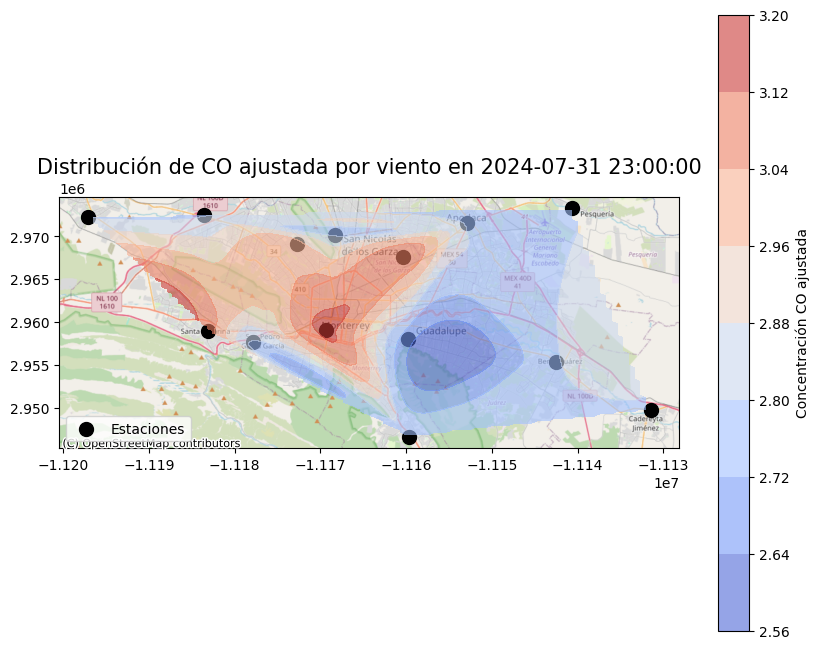

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from pyproj import Transformer

# Asegúrate de que las columnas 'date' y 'time' estén en el formato adecuado
df_completo['date'] = pd.to_datetime(df_completo['date']).dt.date  # Solo la fecha
#df_completo['time'] = pd.to_datetime(df_completo['time']).dt.time  # Solo la hora

# Fecha y hora específicas para filtrar
fecha_especifica = '2024-07-31'
hora_especifica = '23:00:00'

# Filtrar los datos por fecha y hora separadas
df_filtrado = df_completo[(df_completo['date'].astype(str) == fecha_especifica) &
                          (df_completo['time'].astype(str) == hora_especifica)]

# Agrupar por Zona para calcular las concentraciones promedio de CO, WSR, WDR para esa fecha/hora
coords_zonas = df_filtrado.groupby('Zona').agg({
    'latitud': 'mean',
    'longitud': 'mean',
    'CO': 'mean',
    'WSR': 'mean',
    'WDR': 'mean'
}).reset_index()

# Crear un GeoDataFrame con las coordenadas de las zonas
gdf_zonas = gpd.GeoDataFrame(
    coords_zonas,
    geometry=gpd.points_from_xy(coords_zonas['longitud'], coords_zonas['latitud']),
    crs="EPSG:4326"  # Sistema de coordenadas WGS 84
)

# Transformar a un sistema de coordenadas proyectadas adecuado para añadir el mapa base
gdf_zonas = gdf_zonas.to_crs(epsg=3857)  # Proyección Web Mercator (compatible con contextily)

# Crear una malla de puntos para la interpolación
lon_grid, lat_grid = np.mgrid[
    coords_zonas['longitud'].min():coords_zonas['longitud'].max():100j,
    coords_zonas['latitud'].min():coords_zonas['latitud'].max():100j
]

# Realizar la interpolación
interpolated_CO = griddata(
    (coords_zonas['longitud'], coords_zonas['latitud']),
    coords_zonas['CO'],
    (lon_grid, lat_grid),
    method='cubic'
)

# Ajustar la interpolación de CO según la velocidad del viento
interpolated_CO_adjusted = interpolated_CO * (1 + coords_zonas['WSR'].mean() / max(coords_zonas['WSR']))

# Crear un transformador para convertir de WGS84 (EPSG:4326) a Web Mercator (EPSG:3857)
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)

# Transformar las coordenadas de la malla
lon_grid_proj, lat_grid_proj = transformer.transform(lon_grid, lat_grid)

# Crear el mapa base
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar las estaciones
gdf_zonas.plot(ax=ax, color='black', markersize=100, label='Estaciones')

# Añadir el mapa base de contexto con contextily
ctx.add_basemap(ax, crs=gdf_zonas.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Graficar el mapa de calor utilizando las coordenadas proyectadas
contour = ax.contourf(lon_grid_proj, lat_grid_proj, interpolated_CO_adjusted, cmap='coolwarm', alpha=0.6)

# Agregar una barra de colores
cbar = fig.colorbar(contour, ax=ax, label='Concentración CO ajustada')

# Añadir título y etiquetas
plt.title(f'Distribución de CO ajustada por viento en {fecha_especifica} {hora_especifica}', fontsize=15)
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
df_completo = df_completo.drop("")

In [ ]:
import pandas as pd

# Asumiendo que df_completo ya está cargado
# Dropear la columna 'zona_encoded'
df_completo = df_completo.drop(columns=['zona_encoded'])

# Ruta donde se guardará el archivo
ruta_guardado = '/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/USAR/'

# Nombre del archivo
nombre_archivo = "etapa.csv"

# Guardar el dataframe como archivo CSV
df_completo.to_csv(ruta_guardado + nombre_archivo, index=False)

print(f"Archivo guardado exitosamente en: {ruta_guardado}{nombre_archivo}")


Archivo guardado exitosamente en: /content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/USAR/etapa.csv


In [ ]:
df_completo

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WSR,WDR,time,Zona,Nombre_Estacion,Clave_Estacion,latitud,longitud
0,2020-01-01,1.590513,7.429848,14.237414,21.449283,26.809009,86.340000,26.833002,5.259488,7.650536,130.672489,00:00:00,0,Centro Obispado,Obispado,25.676020,-100.335847
1,2020-01-01,1.381808,7.176633,10.646510,17.772000,23.948641,37.000000,18.000000,4.565240,7.060968,122.526566,00:00:00,12,Sureste3 Cadereyta,Cadereyta,25.600870,-99.995334
2,2020-01-01,1.476593,7.306120,12.767709,19.890098,25.725538,66.000000,21.508055,4.889302,7.615128,127.187992,00:00:00,10,Sureste Tec NL,Tec de Nuevo León,25.668270,-100.249580
3,2020-01-01,1.459790,7.287871,12.550938,19.660130,25.565734,63.000000,20.722665,4.834703,7.609906,126.674054,00:00:00,13,Suroeste Santa Catarina,Santa Catarina,25.675356,-100.460037
4,2020-01-01,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,00:00:00,9,Sur,Preparatoria ITESM,25.575383,-100.249371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659355,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,23:00:00,12,Sureste3 Cadereyta,Cadereyta,25.600870,-99.995334
659356,2024-07-31,1.412255,7.235056,11.923070,18.993616,25.130810,54.545635,18.509206,4.682113,7.599502,125.136131,23:00:00,3,Noreste3 Pesqueria,Pesqueria,25.791343,-100.078176
659357,2024-07-31,1.559661,0.331810,10.146920,10.000000,20.000000,79.000000,24.270156,4.043973,7.497009,102.000000,23:00:00,13,Suroeste Santa Catarina,Santa Catarina,25.675356,-100.460037
659358,2024-07-31,1.567964,7.000000,9.000000,15.642175,22.000000,93.000000,28.799963,5.417768,7.406626,135.000000,23:00:00,1,Noreste San Nicolas,San Nicolas,25.745430,-100.255020
